# 다양한 실험
• ① Random Init / NN Layer #1 (784=>10) / SGD / CrossEntropy
- https://colab.research.google.com/drive/15ArrVdJELyV-PeuATH5poe2uZoHm6Ih8

• ② Random Init / NN Layer #1 (784=>10) / Adam / CrossEntropy
- https://colab.research.google.com/drive/1bimNZtout48XzSy7VoWbmdpOHQ-SAkHX

• ③ Random Init / NN Layer #3 (784=>256=>10) / Adam / CrossEntropy
- https://colab.research.google.com/drive/1jsP6IkoSZW5roMip53QSPJjiVP6Ej3Zk

• Xavier Init / NN Layer #3 (784=>256=>10) / Adam / CrossEntropy
- https://colab.research.google.com/drive/1CI11CA5otqB7-RsQLKak3LJW3xeCUr9q

• Xavier Init / DNN Layer #5 (784=>256=>10) / Adam / CrossEntropy
- https://colab.research.google.com/drive/1y9qF3D4vbQVhX_dZCgplRuw_EcgW8Sg2

• Xavier Init / DNN Layer #5 (784=>256=>256=>256=>10) / Adam / CrossEntropy / 
dropout (0.3)
- https://colab.research.google.com/drive/15Q5GSAPgsHeR0Y70zaiigHBBo4kwJ86o

• SGD Adam NN Xavier DNN Dropout
- 0.42/ 0.77/ 0.94/ 0.9791/ 0.9824/ 0.9776

### • ① Random Init / NN Layer #1 (784=>10) / SGD / CrossEntropy

In [ ]:
import torch
import torchvision.datasets as data
import torchvision.transforms as transforms
import random

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
  torch.cuda.manual_seed_all(777)

In [ ]:
# 학습 파라미터 설정
learning_rate = 0.001
training_epochs = 15
batch_size = 100

root: 저장경로
학습/테스트 데이터 선택: True 학습데이터
transform:
download: 


In [ ]:
mnist_train = data.MNIST(root='MNIST_data/',
                         train=True,
                         transform=transforms.ToTensor(),
                         download=True)

mnist_test = data.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

In [ ]:

data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)


![대체 텍스트](https://user-images.githubusercontent.com/11758940/83336289-229ec200-a2ed-11ea-9fb8-88a51198e475.png)

In [ ]:
linear = torch.nn.Linear(784,10,bias=True)

[메뉴얼] https://pytorch.org/docs/stable/nn.init.html#torch.nn.init.normal_

In [ ]:
torch.nn.init.normal_(linear.weight)

Parameter containing:
tensor([[-0.1953, -0.4404,  0.0139,  ...,  0.7510,  1.5190,  0.9637],
        [ 0.4146, -1.0660, -0.9969,  ..., -0.3259, -0.2695, -1.3316],
        [ 0.2600, -1.1821,  0.0065,  ...,  1.0648, -1.2251,  0.9841],
        ...,
        [ 0.0279, -1.7242, -1.1723,  ...,  1.3651, -0.0689, -0.7931],
        [ 0.0952,  0.1939,  0.1636,  ..., -1.0489,  0.6224, -1.7181],
        [ 2.6504,  0.6297, -1.6571,  ..., -0.0781, -1.1398, -0.8711]],
       requires_grad=True)

In [ ]:
model = torch.nn.Sequential(linear).to(device) # 'cuda'

[메뉴얼] https://pytorch.org/docs/stable/nn.html#crossentropyloss

In [ ]:
loss = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) # 0.49
# optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) # 0.89

In [ ]:

total_batch = len(data_loader) # 600개 -> 데이터: 60000개, mini-batch: 100개
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:

        # (100, 1, 28, 28) 크기의 텐서를 (100, 784) 크기의 텐서로 변형
        X = X.view(-1, 28 * 28).to(device) # GPU에 태워야 됨
        # one-hot encoding되어 있지 않음
        Y = Y.to(device)
        #%debug

        # 그래디언트 초기화
        optimizer.zero_grad()
        # Forward 계산
        hypothesis = model(X)
        # Error 계산
        cost = loss(hypothesis, Y)
        # Backparopagation
        cost.backward()
        # 가중치 갱신
        optimizer.step()

        # 평균 Error 계산
        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 14.412127495
Epoch: 0002 cost = 12.303294182
Epoch: 0003 cost = 10.895568848
Epoch: 0004 cost = 9.731603622
Epoch: 0005 cost = 8.741955757
Epoch: 0006 cost = 7.915794849
Epoch: 0007 cost = 7.235562325
Epoch: 0008 cost = 6.667675972
Epoch: 0009 cost = 6.180422306
Epoch: 0010 cost = 5.753479004
Epoch: 0011 cost = 5.375113487
Epoch: 0012 cost = 5.038181782
Epoch: 0013 cost = 4.737372875
Epoch: 0014 cost = 4.468424320
Epoch: 0015 cost = 4.227678299
Learning finished


In [ ]:
# Test the model using test sets
with torch.no_grad():
    # flaot() : GPU=>CPU로 데이터 내리기 -> 하지만 여기서는 단순히 type 바꿔주는 역할
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test # 10개의 클래스 중 확률값이 가장 큰 것 -> 1
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())


Accuracy: 0.42159998416900635


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [ ]:
# 랜덤 테스트
r = random.randint(0, len(mnist_test) - 1)
X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

print('Label: ', Y_single_data.item())
single_prediction = model(X_single_data)
print('Prediction: ', torch.argmax(single_prediction, 1).item())

Label:  8
Prediction:  7


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


tensor([8], device='cuda:0')


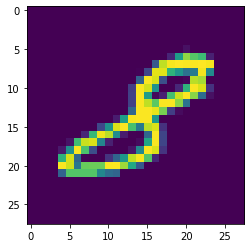

In [ ]:
# 숫자 눈으로 뿌려보기
import matplotlib.pyplot as plt
plt.imshow(X_single_data.reshape(28,28).cpu())
print(Y_single_data)